## Your first insight and analysis in Python - Publicly avaliable data
The idea behind this Jupyter notebook is to guide users through the key utilities that Python has so that they can start to bring Pyhton into their day to day work. It should provide all the groundwork needed to move on to trying the later learning tools like the learning version of the disproportionality tool. The key tools are:

1) Loading packages - these are bits of Python that have been pre-coded by other people, allowing you to write in a line
or two, code that might otherwise be hundreds of lines.

2) Importing data from tables like excel workbooks and putting it into Pandas DataFrames - we can think of these as the 
Python equivalent of excel tables, and they allow us to do lots of powerful analysis very easily.

3) Joining tables - this is like a SQL join, or adding rows from one table to another in excel using a lookup or index-match.

4) Performing calculations on tables, rows, and columns - this can be as simple as finding the sum, mean, or median of a column, through to things like finding the quartiles of a range of values based on user defined conditions. For instance, in some data set we may want to find the quartiles of the time between referral and CP plan for children who start CP plans in given years. In fact, the drift tool does this exact calculation.

5) Displaying the results of analysis or investigation as visualisations, graphs, and plots.

To do the exercises in this notebook, you need some data. We will be using data published by the DfE which provides statistics about children in LAs nationally for things like gender, ethnicity, and school characteristcs. Follow this link to download it, unzip the folder and move the file sin the 'data' folde to a folder on your computer where it won't be deleted: https://content.explore-education-statistics.service.gov.uk/api/releases/cf516998-1dc1-411d-8225-13f6320547fb/files


## Importing packages
Python, as standard, allows us to do huge numbers of complex things. Some of these things, however, may take many many lines of complex code, and we may want to do them very regularly. In many instances, for things like this, people will have pre-written packages that have, working in the background, all of that code, so all you have to do is write a line or two to instantiate it. This saves you time writing code, and also, in most instances, makes for code that runs faster too.

We need a few different packages to do the work we are doing today:

1) First of all we want to import Numpy (the pronunciation of this package is contested but the most commonly accepted version is num-pie, but some people use num-pee). Numpy allows us to easily perform lots of calculations and, lots of the calculations in other packages we use are built on the ones in numpy, so it has to be there to make the other packages work too. We will import numpy but under the abbreviation np, allowing us to write less to call it in the code. We do this by writing the code: import numpy as np

2) The next package we need is Pandas. This is builf on top of numpy, using numpy to perform lots of calculations. So, just as we use packages to make our work easier, some packagaes use other packages to make thier work easier too. Pandas allows us to read data into Python and store it in data frames, these can be thought of as the equivalent of excel tables. They generally have columns with headers indicating what is in each column, for instance date, cost, or unique id. Similarly, data frames have rows, like excel tables, these are normally for individual sources of data. As an example, each row may refer to a child and have their Person ID, the date of their referral, the type of pvovision children's services is giving them, and their age. Pandas allows us to read in data as data frames, join or merge tables, perform calculations on tables, and select sections of tables based on logical operators. As we use Pandas so often, we shorten the name to pd. We import it with the line: import pandas as pd

3) For this notebook, we will be using publicly avaliable data from teh DfE, you should have alrerady downloaded this and stored it somewhere locally. When you navigate to the folder containing the data on your computer it will have a file location, maybe something like c:\\\data\903_final When you'r ein the folder containing the data, you can find the file location by clicking in the bar at the top of the file explorer which lists the order of the files you're in, this will highlight the filepath allowing you to copy and paste it. To read in data, Python needs to know where it is. To tell Python where data is, we us a package called os (short for operating system) which can be told to tell Python to look for files in certain locations. To import os for use we write the line of code: import os

4) Once we have data in Python, and have performed necessary calculation in it, we need to visualise or plot it. We will use two packages for this: Matplotlib, and Seaborn. We need Matplotlib as Seaborn is built on top of it. We use Seaborn as it allows us to make Matplotlib visualisations that look better than base Matplotlib visualisations, and can be written in far fewer lines of code. We will import matplotlib as plt, and seaborn as sns. to do this we will need to write two seprate lines of code: import matplotlib as plt, and import seaborn as sns.

Importing the packages has been begun below, try and import the rest of the packages.

In [1]:
#  Import numpy
import numpy as np
#  Import pandas
import pandas as pd
#  Import os
import os
#  Import matplotlib
import matplotlib.pyplot as plt
#  Import seaborn
import seaborn as sns

## Getting the data
It is best practice to get our packages imported right at the beginning of code, it helps us to read code and also find what packages we have and haven't got. Now we have out packages, we need to get some data in. First things first, we need to the Python where to look for our data. We use the package os for this. We will tell os to change the directory (where Python should look for files) using the .chdir method on it. We do this by writing the line: os.chdir() where filepath is put between the brackets. For instance, if the DfE data is stored in the DfE_data folder with the filepath  c:\\\data\DfE_data, we would write os.chdir(c:\\\data\DfE_data) to tell Python where to look. 

But wait, this isn't QUITE right, Python would read  c:\\\data\DfE_data as code it doesn't understand. We need a way to tell Python that something is text (also called a string), not code. We do this by putting it between either a pair of single quotes (''), or double quotes (""). It is generally best practice to use double quotes. This is because, if some text has an apostrophe in it, and we have used single quotes, Pythonm reads the apostrope as the second single quote, telling it that the text following it should be read as code. We can get around this by using double quotes, which allow aopstrophes between them without telling Python it is no longer reading a string. Another important point: Python reads some characters following a backslash (\) as special characters. To avoid Python trying to do this with a filepath, we put a lower case r before the quotes, this tells Python to read it as a raw string, or exactly not it is, and not to try and interpret the backslashes as starting special characters. So, if your data is in  c:\\\data\DfE_data, the actual line of code we need is: os.chdir(r"c:\\\data\DfE_data").

The line has been started in the next cell, complete it by deleting the underscored and pasting in your own filepath.

In [2]:
#  Set-up filepath of DfE data
os.chdir(r"\\eschdata\Strategic_Resourcing_CS$\Performance Improvement Team\Data to Insight\Will\DfE data")

Now Python knows where to look for the data, we need to get the data into dataframes. Pandas makes this very easy: pandas reads .CSVs using the pd.read_csv() method, where the name of the .CSV is passed to the method between double quotes, including the file extension. It would look something like this: pd.read_csv("spc_class_size_.csv"). Pandas can read lots of different file types, another useful one is xlsx files, which excel tables are often saved as. This would look something like: pd.read_excel("spc_class_size_.xlsx"). When doing this, there are a couple of requirements. 1, the filename cannot have any spaces in it, you may have to change this manually for each file, spaces can be replaces with underscores. 2, the fileneames must be copied exactly, including capitilisation, punctuation, and file extension, there can also not be any trailing or leading spaces between the quotes. For instance: pr.read_csv(" spc class_size_ ") would not work, there is no .csv at the end for the file extention, there are trailing and leading spaces, and there is a space between words instead of an underscore or nothing. Pandas can also read files from the internet using URLs, if you do the disproportionality tool learning notebook, you will learn how to do that there.

When we read in the dataframe, we also need to assign it to a variable. What this means is that every time we use the dataframe/table in the code, we don't need to write pd.read_csv("spc_class_size_.csv"), we can just use the variable name, and python knows its the same thing. It's sort of like maths where x may stand for a number. It's good practice to think of a name we want to call the dataframe that makes it obvious what it is, it might be good to use the same name as the one of the excel sheet we are using, like 'leaving_care' or 'adoption'. To assign a dataframe to a variable we use the equals sign. To read in the adoption dataframe hten, we write the line: ClassSize = pd.read_csv("spc_class_size_.csv").

The code to read the class size .CSV has been written, using it as an example, now complete the code below to assign 'spc_pupils_age_and_gender_.csv' as a Pandas dataframe to the variable AgeGender.

In [3]:
#  Read in class size csv as ClassSize
ClassSize = pd.read_csv('spc_class_size_.csv')
#  Read in age and gender csv as AgeGender
AgeGender = pd.read_csv('spc_pupils_age_and_gender_.csv')

## Looking at the data
There are a lot of interesting and useful things we can do with Pandas when we read in data. You can read all about it in the documentation https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html . Lots of people don't like to read instruction manuals for things they're doing but for Python the documentation for any package, or any function or method in that package, really should be your first port of call, and the more you use documentation to work out how to use different bits of Python, the easier it will be to use documentation for functions and packages you've never used, opening up whole new avenues of coding. One really useful bit of Pandas suite of pd.read_ methods is the ability to tell it things like: which sheet of the excel file to read, how many rows should be skipped before tables start, which rows and columns should be read/skipped, should dates be read as dates or text/strings, and more. Every time you call a method, even if you don't specify what to do in these instances, there will be default behaviour, so, normally, you're only specifying to change that behaviour. So, for instance, when we read in our CSVs above, the only thing we specified was what the filenames were. This meant that arguments like header (which tells Pandas what row should be used as the headers of the columns, and is set to 'infer' as default), chunksize (which tells Pandas how much of the data to read in one go, important for multi million line files), and delimiter (which tells pandas what seperates the values in the csv if it's not commans) still featured in the command, but were set to their default settings. An argument you might use often when reading in excel files (xlsx, not .csv) is sheet_name, this tells Pandas which sheet of the excel workbook to read. It can be done by sheet index, starting at 0 for the first sheet, or by sheet name, the default setting is to read the sheet at index 0, the first sheet and if you don't specify, this is the sheet it'll read. You specify the arguments of a method using: argument = value, so the default for specifying which sheet to read for pd.read_excel is sheet_name = 0.

It's all well and good to have read the data in, but Python nisn't like excel, reading it in doesn't let us SEE the data. We want to find out a bit about what we've jsut read in. There's some good ways to do this. The first way is to use print and pass it the name of the variable we want to print, this will print it out. So, in the cell below, we could write: print(ClassSize), and, when we runt he cell, it would print the dataframe... sort of. If the data frame is rerally long, like the CLassSIze one is, it prints a snippet of it. Try it now, type print(ClassSize) into the cell below and run the cell.

In [4]:
#  Print the class size dataframe.
print(ClassSize)

       time_period time_identifier geographic_level country_code country_name  \
0           202122   Academic year  Local authority    E92000001      England   
1           202122   Academic year  Local authority    E92000001      England   
2           202122   Academic year  Local authority    E92000001      England   
3           202122   Academic year  Local authority    E92000001      England   
4           202122   Academic year  Local authority    E92000001      England   
...            ...             ...              ...          ...          ...   
47849       201516   Academic year         Regional    E92000001      England   
47850       201516   Academic year         Regional    E92000001      England   
47851       201516   Academic year         Regional    E92000001      England   
47852       201516   Academic year         Regional    E92000001      England   
47853       201516   Academic year         Regional    E92000001      England   

      region_code region_na

Looking at what gets printed to the notebook we can see that we get every column, and the first and last five rows of every column. This is really useful to giv eus an overview of the type of data we have. We can be a bit more specific though. We can use the .head() method on the variable name for the dataframe to print just the top few rows of the dataframe, and we can pass a number to the method to say how many of these rows to look at. The default value in the .head() method is five, so as standard, if we use it on a dataframe inside a print function we will see the first 5 rows of the dataframe. If we wanted to see the first 50 lines, we would write the line of code: print(ClassSize.Head(50)).

In the cell below, print the first 20 lines of the ClassSize dataframe.

In [5]:
#  Print the first 20 lines of ClassSize
print(ClassSize.head(50))

    time_period time_identifier geographic_level country_code country_name  \
0        202122   Academic year  Local authority    E92000001      England   
1        202122   Academic year  Local authority    E92000001      England   
2        202122   Academic year  Local authority    E92000001      England   
3        202122   Academic year  Local authority    E92000001      England   
4        202122   Academic year  Local authority    E92000001      England   
5        202122   Academic year  Local authority    E92000001      England   
6        202122   Academic year  Local authority    E92000001      England   
7        202122   Academic year  Local authority    E92000001      England   
8        202122   Academic year  Local authority    E92000001      England   
9        202122   Academic year  Local authority    E92000001      England   
10       202122   Academic year  Local authority    E92000001      England   
11       202122   Academic year  Local authority    E92000001   

It's also really useful to have a short summary of the dataframe. We can do this using the line: print(ClassSIze.info()) 

The .info() method provieds an overview of the information about the dataframe, it gives index locations of the columns, column names, the number of rows of each column which have non-zero values, and the type of data in each column. Common data types are int64 (64 bit integers), float64 (64 bit numbers which can include decimals), and objects, in most instances in a dataframe an object will be a string, but ti can also be other types of objects such as a datetime object. Don't worry about hwat objects are, for now, just know that almost everything in Python is an object, at that means it has certain properties and methods associated with it. You can read more about them here.

In the following cell, inside a print function, the .info() method has been used on the ClassSize dataframe. DO the same for the AgeGender dataframe.

In [6]:
#  Print info about ClassSize
print(ClassSize.info())
#  Print info about AgeGender
print(AgeGender.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47854 entries, 0 to 47853
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time_period          47854 non-null  int64  
 1   time_identifier      47854 non-null  object 
 2   geographic_level     47854 non-null  object 
 3   country_code         47854 non-null  object 
 4   country_name         47854 non-null  object 
 5   region_code          47553 non-null  object 
 6   region_name          47553 non-null  object 
 7   old_la_code          44844 non-null  float64
 8   new_la_code          44844 non-null  object 
 9   la_name              44844 non-null  object 
 10  phase_type_grouping  47854 non-null  object 
 11  classtype            47854 non-null  object 
 12  keystage             47854 non-null  object 
 13  size                 47854 non-null  object 
 14  number_of_classes    47854 non-null  int64  
 15  number_of_pupils     47854 non-null 

## Looking at data from different columns
One thing that's going to be really useful is looking at what data in in specific columns. To specifc a column from a dataframe we use the name of the dataframe, and then in square brackets and surrounded by double quotes, we give the column name. For instance, if we wanted to specify the la_name column from the ClassSize dataframe (which we know the name of because we printed ClassSize.info, we can use: ClassSize["la_name"] If we wanted to, we could even print just that column using print(ClassSize["la_name"]) but this might not be that useful. What's probably more useful is finding a list of every different LA represented in the CLassSize dataframe. We can do this by using the .unique() method on the ClassSize dataframe and printing it. This has been done in the cell below. Now, try and print a list of all the different types of school in the ClassSize dataframe, these are in the time_period column:

In [7]:
#  Print the unique lA names values from the ClassSize dataframe
print(ClassSize["la_name"].unique())
#  Print a list of all the different LAs in the AgeGender dataframe.
print(ClassSize["time_period"].unique())

['Gateshead' 'Newcastle upon Tyne' 'North Tyneside' 'South Tyneside'
 'Sunderland' 'Hartlepool' 'Middlesbrough' 'Redcar and Cleveland'
 'Stockton-on-Tees' 'County Durham' 'Darlington' 'Northumberland'
 'Knowsley' 'Liverpool' 'St. Helens' 'Sefton' 'Wirral' 'Bolton' 'Bury'
 'Manchester' 'Oldham' 'Rochdale' 'Salford' 'Stockport' 'Tameside'
 'Trafford' 'Wigan' 'Halton' 'Warrington' 'Lancashire'
 'Blackburn with Darwen' 'Blackpool' 'Cheshire East'
 'Cheshire West and Chester' 'Cumbria' 'Barnsley' 'Doncaster' 'Rotherham'
 'Sheffield' 'Bradford' 'Calderdale' 'Kirklees' 'Leeds' 'Wakefield'
 'Kingston upon Hull, City of' 'East Riding of Yorkshire'
 'North East Lincolnshire' 'North Lincolnshire' 'North Yorkshire' 'York'
 'Derbyshire' 'Derby' 'Leicestershire' 'Leicester' 'Rutland'
 'Nottinghamshire' 'Nottingham' 'Lincolnshire' 'North Northamptonshire'
 'West Northamptonshire' 'Birmingham' 'Coventry' 'Dudley' 'Sandwell'
 'Solihull' 'Walsall' 'Wolverhampton' 'Staffordshire' 'Stoke-on-Trent'
 'Heref

## Getting specific parts of a dataframe

We can choose to select just some specific parts of a dataframe by performing an action called 'slicing'. There are a number of ways to slice dataframes. The documentation for slicing dataframes can be found here: https://pandas.pydata.org/docs/user_guide/indexing.html .There are too many ways of slicing to mention them in this tutorial, but it is worth the time to skim through the documentation to get an overview of what  is poswsible so that, when you want to slice, you have an idea of how to do it. The most common ways of slicing are by index locations or ranges, that is, for by rows or columns based on their location in the table, for instance, I might access the first 5 rows of a dataframe by using: print(ClassSize.iloc[0:5]), which prints the rows with indexes 0 thoigh 4, stopping at 5. With Python index ranges, the first number is included, the last number is not (https://stackoverflow.com/questions/509211/understanding-slicing). 

What we are going to do today is slicing but not using a Pandas method, instead, we are going to select a portion of some dataframes based on a logical condition. In this case, we will select all rows of ClassSize where the LA is our home LA, and we will assign this to a new variable, named after our home LA. Mine is East Sussex, so I will use that in the examples. To do this, we need to know how logical operators work in Python. If you have expereicne using them in excel, it's much the same. We set up some logical statement and, based on whether or not it is true, Python will return the fact that it is true or false. So, if we go through ClassSize and ask it if the la_name column is East Sussex, it will return true in every row it is, and false in every one it is not. Using what we learnt above about accessing specific columns of dataframes, the bit of code we would use looks like this: ClassSize["la_name"] == "East Sussex" (Note: python uses two equals to mean equals, != to mean doesn't equal, > and < for greater and less than, and >= and <= for greater or equal and less or equal.) This bit of code we've written doesn't do anything though, it's just the logical statement. WHat we want to get is a new dataframe called EastSussex that takes rows from ClassSize where "la_name" is "East Sussex". the code for this is: EastSussex_CS  = ClassSize[ClassSize["la_name"] == "East Sussex"] What this code does is is looks in ClassSize and finds, for every row, where the statement that la_name is East Sussex is true or false, then it returns the rows of the ClassSize dataframe where it is true and assigns them to EastSussex. You may be asking 'why do I specify th ClassSize datframe twice? Well, the logical operation works out which row numbers of class size are True, and then takes only those row numbers from ClassSize, but there may be times where we want the row number where class size is true, but from a different dataframe, for instance, we may want the rows from AgeGender where class size is true (for some reason?), in that case, the need to specify the dataframe twice allows us more functionality, we specify on the outside the dataframe we want our new dataframe to be made of, and on the inside, the dataframe we are perfoming our logical operation on.

I've written the code below to do this for East Sussex, write another line of code for your home LA, or, if you're from East Sussex, a different one. You can check the spelling or formatting of LA names above where you printed all the unique LA names out (see, it was useful). I've printed the new EastSussex dataframe below so you can check it's worked.

Note: the la name, like East Sussex, goes between double quotes because we want python to read it as text, not code.

In [8]:
#  Make a new dataframe EastSussex using rows of ClassSize where la_name is East Sussex
EastSussex_CS = ClassSize[ClassSize["la_name"] == "East Sussex"]
#Do the same for your home LA

print(EastSussex_CS.head(10))

      time_period time_identifier geographic_level country_code country_name  \
5075       202122   Academic year  Local authority    E92000001      England   
5076       202122   Academic year  Local authority    E92000001      England   
5077       202122   Academic year  Local authority    E92000001      England   
5078       202122   Academic year  Local authority    E92000001      England   
5079       202122   Academic year  Local authority    E92000001      England   
5080       202122   Academic year  Local authority    E92000001      England   
5081       202122   Academic year  Local authority    E92000001      England   
5082       202122   Academic year  Local authority    E92000001      England   
5083       202122   Academic year  Local authority    E92000001      England   
5084       202122   Academic year  Local authority    E92000001      England   

     region_code region_name  old_la_code new_la_code      la_name  \
5075   E12000008  South East        845.0   E1000

## Making a new dataframe with more than one condition
Let's say we wanted a dataframe for our home LA with only data from the most recent year, we could always take a slice of our new dataframe only taking rows where the time_period column is equal to 202122 (look above where you printed the unique values of the time period column to check this) using the code: EastSussex202122 = EastSussex[EastSussex["time_period"] == 202122 ] (Note: 202122 is a number, an int64 to be precise, so we don't want Python to read it as text, so we don't use quotes.) This would work, but we can do one better. Rather than writing two lines of code to make our dataframe, lets do both logical operations in one line by putting each operation between normal brackets ( ) and putting an ampersand & between them. 

The line of code to do this would be as follows:
EastSussex202122_CS = ClassSize[(ClassSize["la_name"] == "East Sussex") & (ClassSize["time_period"] == 202122)]

In [9]:
#  Make a new dataframe using only rows of ClassSize where la_name is East SUssex and time_period is 202122
EastSussex202122_CS = ClassSize[(ClassSize["la_name"] == "East Sussex") & (ClassSize["time_period"] == 202122)]
print(EastSussex202122_CS.head(10))

#  Make a version of this dataframe for your home LA

      time_period time_identifier geographic_level country_code country_name  \
5075       202122   Academic year  Local authority    E92000001      England   
5076       202122   Academic year  Local authority    E92000001      England   
5077       202122   Academic year  Local authority    E92000001      England   
5078       202122   Academic year  Local authority    E92000001      England   
5079       202122   Academic year  Local authority    E92000001      England   
5080       202122   Academic year  Local authority    E92000001      England   
5081       202122   Academic year  Local authority    E92000001      England   
5082       202122   Academic year  Local authority    E92000001      England   
5083       202122   Academic year  Local authority    E92000001      England   
5084       202122   Academic year  Local authority    E92000001      England   

     region_code region_name  old_la_code new_la_code      la_name  \
5075   E12000008  South East        845.0   E1000

Having written code to find the unique LAs and time periods in the CLassSize dataframe, and then taken the rows for the 202122 time_period and your LA from la_names, now write a cell which does the same but for the AgeGender dataframe, so you have a version of the AgeGender dataframe for 202122 and your home LA.

In [10]:
EastSussex202122_AG = AgeGender[(AgeGender["la_name"] == "East Sussex") & (AgeGender["time_period"] == 202122)]
print(EastSussex202122_AG.head(10))

# Create a slice of the AgeGender dataframe for your own local LA.


      time_period time_identifier geographic_level country_code country_name  \
2469       202122   Academic year  Local authority    E92000001      England   
2470       202122   Academic year  Local authority    E92000001      England   
2471       202122   Academic year  Local authority    E92000001      England   
2472       202122   Academic year  Local authority    E92000001      England   
2473       202122   Academic year  Local authority    E92000001      England   
2474       202122   Academic year  Local authority    E92000001      England   
2475       202122   Academic year  Local authority    E92000001      England   
2476       202122   Academic year  Local authority    E92000001      England   
2477       202122   Academic year  Local authority    E92000001      England   
2478       202122   Academic year  Local authority    E92000001      England   

     region_name region_code  old_la_code      la_name new_la_code  \
2469  South East   E12000008        845.0  East S

## Calculations 
There are lots of calculations Pandas allows us to perform on dataframes very simply, we use them by applting the method relating to each calculation to the dataframe and column we are interested in. Let's load up a new dat frame to do this on: spc_pupils_ethnicity_and_language_

In [11]:
EthLang = pd.read_csv("spc_pupils_ethnicity_and_language_.csv")

Now let's take a selection from it of just the most recent year, and our local LA:

In [12]:
EthLangESCC202122 = EthLang[(EthLang["la_name"] == "East Sussex") & (EthLang["time_period"] == 202122)]

Now, because of the way that this .csv is presented, we need to a bit more work to tidy up this dataframe for calculations. Let's say we want to find the total number of students, across all school types, of each ethnicity group. To do this we need to select rows with the value "Total" from the phase type grouping column, and make sure we DON'T take the total rows for the ethnicity column. If you look at the code below, before the second logical operator, there is a '\~', to Python, this means not, so it will return rows where the ethnicity column is not Total, it would also have been possible to use != instead of == and avoid using the '\~'. You will also note that the two logical operators are split across two lines, between the first and the & and the second, this is fine, and even good, as it aids readability and stops lines being too long.

In [13]:
EthLangESCC202122 = EthLangESCC202122[(EthLangESCC202122["phase_type_grouping"] == "Total") 
                                      & ~(EthLangESCC202122["ethnicity"] == "Total")]
EthLangESCC202122 = EthLangESCC202122[["la_name", "ethnicity", "headcount"]]
print(EthLangESCC202122)

           la_name                            ethnicity  headcount
2562   East Sussex   Mixed - Any other Mixed background       1315
2563   East Sussex                         Unclassified       1068
2564   East Sussex                   White - Gypsy/Roma        278
2565   East Sussex  White - Traveller of Irish heritage         53
4544   East Sussex              Black - Black Caribbean         54
4545   East Sussex                White - White British      57121
5374   East Sussex   Asian - Any other Asian background        698
7926   East Sussex               Any other ethnic group        367
7927   East Sussex   Black - Any other Black background         89
7928   East Sussex    Mixed - White and Black Caribbean        727
7929   East Sussex   White - Any other White background       2995
9165   East Sussex                      Asian - Chinese        187
9166   East Sussex                       Asian - Indian        409
9167   East Sussex                    Asian - Pakistani       

You will notice that the printed dataframe above only returns 3 columns, this is done by setting the data frame EthLangESCC202122 equal to EthLangESCC202122 and specifying the columns we want in a comma separated list that's inside square brackets which are, themselves, inside the square brackets used to normally select a single column.

Now we have a nice easy dataframe to work with, lets perform some calculations: lets find the sum, mean, maximum, and minimum values for the ethnicities. These types of operation are called descriptive statistics, and can be read about here: https://pandas.pydata.org/docs/user_guide/basics.html#descriptive-statistics To perform them we simply use the relevant method on the data frame, to print it, we put that inside a print statement. For instance, to find the sum of all students of any ethnicity we would write: print(EthLangESCC202122["headcount"]).sum()  We can do the same using .mean(), .max(), and .min() Complete the cell below to find the mean and the sum. 

In [14]:
print("The total number of people, regardless of ethnicities is:")
print(EthLangESCC202122["headcount"].sum())

print("The average number of people for all ethnicities is:")
print(EthLangESCC202122["headcount"].mean())

The total number of people, regardless of ethnicities is:
67869
The average number of people for all ethnicities is:
3572.0526315789475


We can do more interesting things too, we can print out information like which ethnicities are the most and lest represented. To do this, we need to find EthLangESCC202122["headcount"].min() and EthLangESCC202122["headcount"].max(), but also what the ethnicity in that row is.

The easiest way to do this is to, just as we did earlier, use logical conditions to take a slice of the dataframe where some condition is met, and, instead of assigning it to a variable, just print it. So, in this case, we take a slice of the dataframe EthLAngESCC202122 where the EthLAngESCC202122 headcount colum is equal to the value of the EthLangESCC202122 headcount column's minimum, and then maximum values. Doing this for the minimum uses the following code:
print(EthLangESCC202122[EthLangESCC202122["headcount"] == (EthLangESCC202122["headcount"].min())])

Now, do the same but to find the row with the maximum.

In [15]:
print(' The minumum number of people represented in any ethnicity is:')
print(EthLangESCC202122[EthLangESCC202122["headcount"] == (EthLangESCC202122["headcount"].min())])
print(' The maximum number of people represented in any ethnicity is:')
print(EthLangESCC202122[EthLangESCC202122["headcount"] == (EthLangESCC202122["headcount"].max())])

 The minumum number of people represented in any ethnicity is:
          la_name                            ethnicity  headcount
2565  East Sussex  White - Traveller of Irish heritage         53
 The maximum number of people represented in any ethnicity is:
          la_name              ethnicity  headcount
4545  East Sussex  White - White British      57121


Now we've done this for East Sussex, practice in the next cell by doing it for your own LA. 
1) Slice out your LA and the current time period and assign them to a suitable variable, then, slice this new variable to get out the total for all phase type groupings, and make sure you exclude rows from the ethnicity column which give a totasl instead of an ethnicity.
2) Then, further slice this new variable dataframe to only give you the la_name, ethnicity, and headcount columns.

3) Find the sum of all student of any ethnicity, and the mean number of students from all ethnicities.

4) Find the maximum and minimum values, printing the row for each.

In [16]:
#  Write your code to do this here, use the above code as examples, have no fear about copy-pasting, that's fine!

Now we've got some interesting data into a dataframe, lets visualise it with a nice plot using seaborn, the documentation for which is here https://seaborn.pydata.org/ . We are going to make a barplot to visualise the distribution of ethnicities, the documentation for the seaborn barplot is here: https://seaborn.pydata.org/generated/seaborn.barplot.html . 
sns.barplot(data=EthLangESCC202122, x = "ethnicity", y = "headcount")For a seaborn barplot we need to pass it a dataframe containing our data, a column name for the x values and a column name for the y values as a minimum. we do this by passing data, x, and y, arguments to the seaborn.barplot() function and giving those the names of our dataframe, and relevant column headers as follows: sns.barplot(data=EthLangESCC202122, x = "ethnicity", y = "headcount") (remember, at the beninning we imported seaborn as sns so when we used a seaborn function we could write sns instead of seaborn each time).

This is enough to plot a graph, run the cell below to see.

<AxesSubplot:xlabel='ethnicity', ylabel='headcount'>

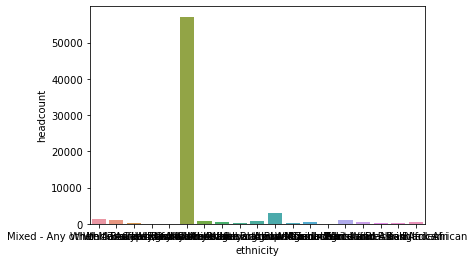

In [17]:
sns.barplot(data=EthLangESCC202122, x = "ethnicity", y = "headcount")

Whilst we have a graph, there's a few problems here: we cant read the x-ticks, there is no title, the x and y labels could be better, the colour scheme is a bit funky, and one value is overshadowing the others so much we can't really see the others. Let's try again. Firstly, lets start by assigning the graph to a variable, this lets us then change parts of the graph by changing the properties of that variable with a graph assigned to it. It's customary to assign the variable fig, or some variation of this, to plots.

We firstly change the rotation of the words on the x axis using the plt.xticks() function, and pass it the argument rotation = 90 to rotate them 90 degrees so they're readable. The plt part of plt.xticks() means you're getting the xticks() function from the matplotlib.pyplot package you installed earlier. The code looks like this: plt.xticks(rotation = 90) It tells Python that, until the command is changed, plots should have their x ticks at 90 degrees.

We want to change the x and y axis titles too. We can do this by using the .set_xlabel() and .set_ylabel() methods on fig, and passing them a string containing the titles we want. For example: fig.set_xlabel("Ethnicity Subgroups") will label the x axis as Ethnicity Subgroups.

Let's also set a title using the method .set_tilte() on fig: fig.set_title("ESCC Ethnic Populations Breakdown") 



Finally, let's change the colour of the graph to be something a bit easier to see, we can do this by adding the 'color =' argument to the sns.barplot() function and passing it a colour, let's say 'red' will be nice and easy to read. The line of code will look like this: fig = sns.barplot(data=EthLangESCC202122, x = "ethnicity", y = "headcount", color = 'red')

At last, we can make the notebook show the graph by calling matplotlib.pyplot to show the graph using plt.show()

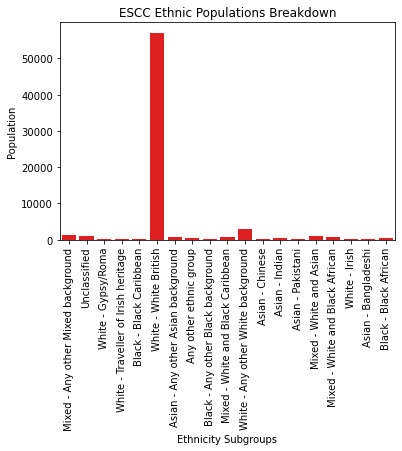

In [18]:
fig = sns.barplot(data=EthLangESCC202122, x = "ethnicity", y = "headcount", color = 'red')

plt.xticks(rotation = 90)
fig.set_xlabel("Ethnicity Subgroups")
fig.set_ylabel("Population")

fig.set_title("ESCC Ethnic Populations Breakdown") 

plt.show()

Maybe we want to show the graph, but only include some of the data from the dataframe, perhaps we want to see the numbers of ethnic groups excluding White - White British, we can easily do that too. The most simple way to do this is to copy/paste the code from the cell above where we made the first graph, but change what the sns.barplot() function takes for the data = argument. To do this, let's slice by rows again. We will define a new variable ESCCNoWB (ESCC No WHite British) as just the rows where the ethnicity column does not (!=) have the value 'White - White British', and then re-plot the graph exactly the same, making sure to pass the data = argument of the sns.barplot() function ESCCNoWB instead of EthLangESCC202122.

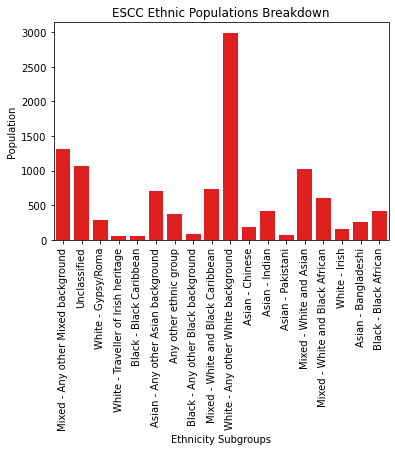

In [19]:
ESCCNoWB = EthLangESCC202122[EthLangESCC202122['ethnicity'] != 'White - White British']

fig = sns.barplot(data=ESCCNoWB, x = "ethnicity", y = "headcount", color = 'red')

plt.xticks(rotation = 90)
fig.set_xlabel("Ethnicity Subgroups")
fig.set_ylabel("Population")

fig.set_title("ESCC Ethnic Populations Breakdown") 

plt.show()

Now you've seen how to make a plot, using EthLAng dataframe you made for your own LA and time period above, plot a graph showing the breakdown of ethnic groups.

1) Start by setting fig = sns.barplot( data = ___, x = ___, y = ___ ) and passing the dataframe to data, the 'ethnicity' column to x, and the 'headcount' column to y, maybe set a colour too by passing a colour to the color = argument. Information about colours and colour palettes can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html 

2) Using the example above, set a rotation for plt.xticks(), and assign suitable labels and titles with fig.set_title(), fig.set_xlabel() and fig.set_ylabel(). FInally, call plt.show() to show your plot and run the cell.

In [20]:
# Write the code to make an Ethnic Populations Breakdown plot for your local LA

Now, just for practice, slice the dataframe you used to make the last plot to remove the 'White - White British' row, and make a new plot with that new dataframe. Remember, to slice out the right row you need to take all rows of your local LA dataframe where, for rows in your local LA dataframe, the 'ethnicity' column does not equal (!=) 'White - White British'

In [21]:
#  Plot the same graph again but exclude the 'White - White British' row

So, if you've completed this notebook, you've read in data from your computer, you've organised the data and selected the data you want, you've done some summary statistical calculations on that data, and you've made two nice clean visualisations of different selections of that data. You should also have looked at some of the documentation for the packages you've used. With these skills, you can start to move forwards to do the same thing, but with many different data sources, and many different visualisations. Just before you finish up, it's worth looking at the seaborn example gallery documentation to see all the types of thing that are possible with seaborn if you keep at it: http://seaborn.pydata.org/examples/index.html Now is maybe the time to look at some of our tool, the ChAT tool, the Drift tool, and the Disproportionality tool (which actually uses the same data you've used today). See if you can complete the learner versions of the tools, and see if you can understand and make changes to the dev version too.